### 聚类案例

In [11]:
import pandas as pd
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [12]:
X = beer[['calories','sodium','alcohol','cost']]

### K-means clustering

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)  # n_clusters簇，聚成多少个堆
km2 = KMeans(n_clusters=2).fit(X)

In [14]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [16]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')  # 查看聚类的结果

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
16,Hamms,139,19,4.4,0.43,0,1


In [18]:
from pandas.plotting import scatter_matrix
%matplotlib inline

cluster_centers = km.cluster_centers_
cluster_centers_2 = km2.cluster_centers_

In [19]:
beer.groupby('cluster').mean()  # 查看每个cluster在每个特征的均值

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,1
1,102.75,10.0,4.075000,0.440000,0
2,70.00,10.5,2.600000,0.420000,0


In [20]:
beer.groupby('cluster2').mean()  # 查看每个cluster在每个特征的均值

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.333333
1,150.000000,17.000000,4.521429,0.520714,0.000000


In [21]:
centers = beer.groupby('cluster').mean().reset_index()  # 获取中心点

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14 # 指定画布大小

In [24]:
import numpy as np
colors = np.array(['red','green','blue','yellow'])  # 指定颜色

Text(0, 0.5, 'Alcohol')

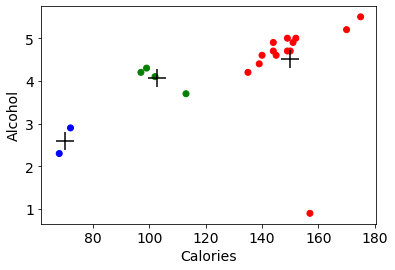

In [26]:
plt.scatter(beer['calories'], beer['alcohol'], c=colors[beer['cluster']])  # 画点

plt.scatter(centers.calories, centers.alcohol,
            linewidths=3,marker='+',s=300,c='black')  # 画中心点

plt.xlabel('Calories')
plt.ylabel('Alcohol')
# 两个维度

Text(0.5, 0.98, 'With 3 centroids initialized')

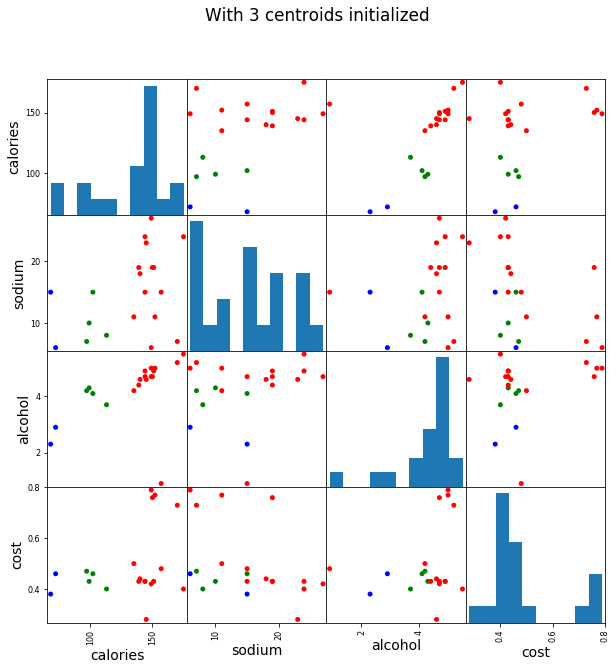

In [28]:
# 画四个维度，三个簇的，两两指标比较
scatter_matrix(beer[['calories','sodium','alcohol','cost']], 
               s=100,alpha=1,c=colors[beer['cluster']],figsize=(10,10))

plt.suptitle('With 3 centroids initialized')

Text(0.5, 0.98, 'With 2 centroids initialized')

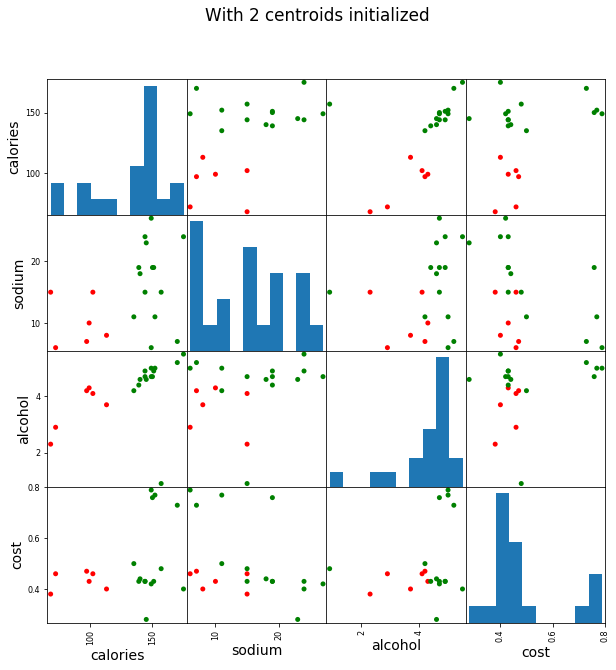

In [29]:
# 画四个维度，两个簇的，两两指标比较
scatter_matrix(beer[['calories','sodium','alcohol','cost']], 
               s=100,alpha=1,c=colors[beer['cluster2']],figsize=(10,10))

plt.suptitle('With 2 centroids initialized')

这样我们就可以观测，到底选择3个簇还是2个簇

### Scaled data 查看标准化后的结果

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # 归一化
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [31]:
km = KMeans(n_clusters=3).fit(X_scaled)  # 重新训练

In [32]:
beer['scaled_cluster'] = km.labels_
beer.sort_values('scaled_cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,1,0
1,Schlitz,151,19,4.9,0.43,0,1,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0
16,Hamms,139,19,4.4,0.43,0,1,0
5,Old_Milwaukee,145,23,4.6,0.28,0,1,0
6,Augsberger,175,24,5.5,0.40,0,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1,0
10,Coors,140,18,4.6,0.44,0,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,0,1
12,Michelob_Light,135,11,4.2,0.50,0,1,1


In [33]:
beer.groupby('scaled_cluster').mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,148.375,21.125,4.7875,0.4075,0.0,1.00
1,105.375,10.875,3.3250,0.4475,1.0,0.25
2,155.250,10.750,4.9750,0.7625,0.0,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297A80202B0>,
      dtype=object)

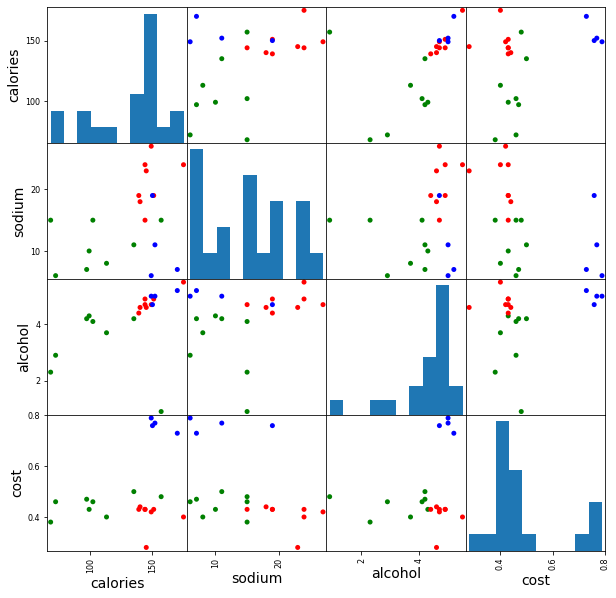

In [34]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']], 
               s=100,alpha=1,c=colors[beer['scaled_cluster']],figsize=(10,10))

### 聚类评估：轮廓系数（Silhouette Coefficient）
最常用的评估方法
<img src="assets/20201125210741.png" width="50%">
<ul>
    <li>计算样本到同簇其他样本的平均距离ai，ai越小,说明样本越应该被聚类到该簇。将ai称为样本的簇内不相似度。
    <li>计算样本到其他某族Cj的所有样本的平均距离bij,称为样本i与Cj的不相似度。定义为样本的族间不相似度:bi=min{bi1, bi2,..., bik}
    <li>Si接近1,则说明样本聚类合理
    <li>Si接近-1,则说明样本更应该分类到另外的簇
    <li>若si近似为0,则说明样本在两个簇的边界上。

In [35]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)  # 归一化的聚类结果
score = metrics.silhouette_score(X,beer.cluster)  # 非归一化的聚类结果
print(score_scaled, score)  # 不做归一化反而好了，所以不一定要做归一化，主要看结果

0.1797806808940007 0.6731775046455796


In [38]:
scores = []  # 遍历获取最佳K值，选取score最大的k值
scores_dict = {}
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores_dict[k] = score
    scores.append(score)

scores_dict  # 可以看到k=2时，score最大

{2: 0.6917656034079486,
 3: 0.6731775046455796,
 4: 0.5857040721127795,
 5: 0.422548733517202,
 6: 0.4559182167013377,
 7: 0.43776116697963124,
 8: 0.38946337473125997,
 9: 0.39746405172426014,
 10: 0.3915697409245163,
 11: 0.32472080133848924,
 12: 0.377361166112964,
 13: 0.31221439248428434,
 14: 0.30707782144770296,
 15: 0.31834561839139497,
 16: 0.2849514001174898,
 17: 0.23498077333071996,
 18: 0.1588091017496281,
 19: 0.08423051380151177}

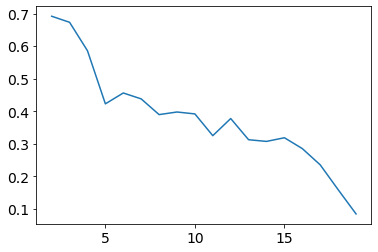

In [39]:
plt.plot(list(range(2,20)),scores)

### DBSCAN clustering

In [41]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)  # eps半径,min_samples最小密度

In [42]:
labels = db.labels_

In [44]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,0,1,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,2,-1
6,Augsberger,175,24,5.5,0.40,0,1,0,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0,0
16,Hamms,139,19,4.4,0.43,0,1,0,0
14,Kirin,149,6,5.0,0.79,0,1,2,0
13,Becks,150,19,4.7,0.76,0,1,2,0
12,Michelob_Light,135,11,4.2,0.50,0,1,1,0
10,Coors,140,18,4.6,0.44,0,1,0,0
0,Budweiser,144,15,4.7,0.43,0,1,0,0
